In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import pickle

### Data Preparation

In [2]:
#pip install kagglehub

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# print("Path to dataset files:", path)

In [4]:
data = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#### Preparing Column names and Values to get rid of inconsistent Alphabet cases to all lower case and space bars to _

In [7]:
# Columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [8]:
# values

string_values =list(df.dtypes[df.dtypes == 'object'].index)

for col in string_values:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
#
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
# total charges should be numeric but it is object data type

tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [12]:
# missing values in tc
tc.isnull().sum()

11

In [13]:
# view data frame of null totalcharges

df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
df.totalcharges.isnull().sum()

0

In [15]:
# view data frame of null totalcharges

df['totalcharges']=df.totalcharges.replace('_',np.nan).astype(float)

In [16]:
df.totalcharges.isnull().sum()

11

In [17]:
#fill the missing values

df.totalcharges = df.totalcharges.fillna(0)

In [18]:
df.totalcharges.isnull().sum()

0

In [19]:
# Check if all columns are read correctly

(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [20]:
#convert to numbers

df.churn = (df.churn == 'yes').astype(int)

In [21]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

### Setup validation framework

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [24]:
print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}')

lenght of full train is 5634,
lenght of test is 1409


In [25]:
# further divide the full train to obtain 20 percent for the validation
# 25% of 80% is 20% of the original dataset length

df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [26]:
print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}\n'
      f'length of validation is {len(df_val)}')

lenght of full train is 5634,
lenght of test is 1409
length of validation is 1409


In [27]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [28]:
# reset index because the elements are now shuffled

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [29]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [30]:
# target values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [31]:
#Delet churn variable from the data frame

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [32]:
df_train.shape

(4225, 20)

### EDA

use df_full_train for EDA

In [33]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [34]:
df.duplicated().sum()

0

##### Churn rate: for categorical variables is the mean because the number of ones is the sum of the record

In [35]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [36]:
df_full_train.churn.value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [37]:
df_full_train.churn.mean()

0.26996805111821087

In [38]:
global_churn_rate = df.churn.mean()

In [39]:
round(global_churn_rate, 2)

0.27

In [40]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [41]:
numerical = ['tenure', 'monthlycharges', 'totalcharges' ]

categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [42]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Churn rate analysis

In [43]:
churn_female = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
churn_female

0.27682403433476394

In [44]:
churn_male = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
churn_male

0.2632135306553911

In [45]:
print(f'Churn rate for males {global_churn_rate - churn_male}\nChurn rate female {global_churn_rate - churn_female}')

Churn rate for males 0.002156340138304791
Churn rate female -0.011454163541068041


In [46]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [47]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [48]:
print(f'Churn rate with partner {global_churn_rate - churn_partner}\nChurn rate without {global_churn_rate - churn_male}')

Churn rate with partner 0.06033656213344424
Churn rate without 0.002156340138304791


##### Observation: churn rates for groups should be close to the global churn rate. if they are far, irrespective of the signs,they are more likely to churn. In order words, if the group churn rate is higher, then they are less likely to churn, if it is lower, they are more likely to churn

### Churn Risk Ratio

Risk ratio greater than 1 are more likely to churn, less than 1 are less likely to churn

In [49]:
churn_partner/global_churn_rate

0.772632205935876

In [50]:
churn_no_partner/global_churn_rate

1.2428276168140047

##### Risk Ratios greater than 1 are more likely to churn, those less than 1 are less likely to churn

In [51]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count']) #agg takes a list of aggregations we can perform
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate

In [52]:
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.011454,1.043163
male,0.263214,2838,-0.002156,0.991874


In [53]:
# for all categorical vriables
from IPython.display import display


for c in categorical:
    
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count']) #agg takes a list of aggregations we can perform
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.011454,1.043163
male,0.263214,2838,-0.002156,0.991874




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.023100,0.912953
1,0.413377,912,0.148007,1.557740




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.064439,1.242828
yes,0.205033,2702,-0.060337,0.772632




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.048390,1.182350
yes,0.165666,1666,-0.099704,0.624284




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.024054,0.909358
yes,0.273049,5087,0.007679,1.028937




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.007962,0.969995
no_phone_service,0.241316,547,-0.024054,0.909358
yes,0.290742,2387,0.025372,1.095609




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.073022,0.724828
fiber_optic,0.425171,2479,0.159802,1.602184
no,0.077805,1221,-0.187565,0.293195




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.155551,1.586168
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.153226,1612,-0.112144,0.577405




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.138954,1.523622
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.217232,1915,-0.048137,0.818602




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.130506,1.491787
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.230412,1940,-0.034957,0.868269




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.153544,1.578604
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.159926,1632,-0.105443,0.602655




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.077462,1.291901
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.302723,2167,0.037353,1.140757




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.073537,1.277110
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.307273,2200,0.041903,1.157904




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.166331,1.626790
one_year,0.120573,1186,-0.144797,0.454360
two_year,0.028274,1344,-0.237096,0.106545




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.093299,0.648419
yes,0.338151,3321,0.072781,1.274264




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.097199,0.633722
credit_card_(automatic),0.164339,1217,-0.101031,0.619281
electronic_check,0.455890,1893,0.190520,1.717942
mailed_check,0.193870,1305,-0.071500,0.730564


### Mutual Information

In [54]:
from sklearn.metrics import mutual_info_score

In [55]:
mutual_info_score(df_full_train.churn, df_full_train.contract )

0.0983203874041556

In [56]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [57]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [58]:
for c in categorical:
    mis = mutual_info_score(df_full_train.churn, df_full_train[c] )
    #print(f'{c} : {mis.sort()}')
    print(c, ' ', mis)

gender   0.0001174846211139946
seniorcitizen   0.009410216144208144
partner   0.009967689095399745
dependents   0.012345815445534689
phoneservice   0.00022871269738296285
multiplelines   0.0008574478744731856
internetservice   0.055867945893496467
onlinesecurity   0.06308524972985574
onlinebackup   0.0469234640537918
deviceprotection   0.04345286925268559
techsupport   0.06103245991777444
streamingtv   0.03185333110086085
streamingmovies   0.03158089669519908
contract   0.0983203874041556
paperlessbilling   0.01758882715925275
paymentmethod   0.043210027531582915


In [59]:
# we can use Apply

def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [60]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Correlation

In [61]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [62]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [63]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [64]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [65]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [66]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [67]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [68]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [69]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

### One Hot Encoding

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [72]:
df_train[['gender', 'contract']].iloc[:20].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'}]

In [73]:
dicts = df_train[['gender', 'contract']].iloc[:500].to_dict(orient = 'records')

In [74]:
dv = DictVectorizer(sparse = False)

In [75]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [76]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [77]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [78]:
# Another way to get the feature names

dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [79]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records') 
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [80]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [81]:
dv.transform(train_dict[:1])

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03]])

In [82]:
list(dv.transform(train_dict[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [83]:
# Another way to get the feature names

dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [84]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dict)

X_train.shape

(4225, 45)

In [85]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(1409, 45)

In [86]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

### Sigmoid for logistic regression

In [87]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [88]:
sigmoid(-100)

3.7200759760208356e-44

In [89]:
z = np.linspace(-7 ,7, 51)

In [90]:
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

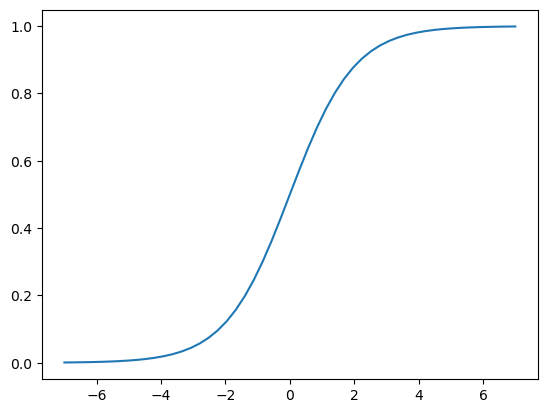

In [91]:
plt.plot(z, sigmoid(z))

In [92]:
def LinReg(xi):
    
    result = w0
    
    for j in range(len(xi)):
        result = w0 + xi[j] * w[j]
        
    return result

In [93]:
def LogReg(xi):
    
    result = w0
    
    for j in range(len(xi)):
        result = w0 + xi[j] * w[j]
        
    return sigmoid(result)

### Logistic Regression using Scikit-Learn

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
# Hard predict

model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [97]:
# Soft predict. the both columns are for the negative and positive class
# we are interested in the POSITIVE class

model.predict_proba(X_val)

array([[0.99212731, 0.00787269],
       [0.7919705 , 0.2080295 ],
       [0.78127308, 0.21872692],
       ...,
       [0.84800872, 0.15199128],
       [0.2195863 , 0.7804137 ],
       [0.19121241, 0.80878759]])

In [98]:
#weights

model.coef_

array([[ 5.97616551e-01, -1.15719221e-01, -6.02575501e-01,
        -2.77831669e-02, -9.28950039e-02,  5.65388161e-02,
        -1.04103522e-01, -7.31134650e-02, -3.91736184e-02,
        -8.15045524e-02, -3.74595541e-01,  3.58020892e-01,
        -1.04103522e-01,  3.03814638e-03, -2.51470163e-01,
         1.59082591e-01, -2.82905994e-02,  5.58535196e-02,
        -1.04103522e-01, -7.24281686e-02,  2.25258111e-01,
        -1.04103522e-01, -2.41832760e-01, -2.36104534e-01,
         1.15426363e-01, -1.20351257e-01, -3.26914149e-04,
        -9.92528288e-02, -3.48063115e-02,  3.66189556e-02,
        -2.32379861e-02,  1.59082591e-01, -2.79760762e-01,
         2.13161767e-01, -1.02891241e-01, -1.04103522e-01,
         8.63165917e-02, -5.98411651e-02, -1.04103522e-01,
         4.32665161e-02,  1.68193591e-01, -1.04103522e-01,
        -1.84768240e-01, -6.77682672e-02,  3.82708605e-04]])

In [99]:
model.coef_[0].round(3) #.shape

array([ 0.598, -0.116, -0.603, -0.028, -0.093,  0.057, -0.104, -0.073,
       -0.039, -0.082, -0.375,  0.358, -0.104,  0.003, -0.251,  0.159,
       -0.028,  0.056, -0.104, -0.072,  0.225, -0.104, -0.242, -0.236,
        0.115, -0.12 , -0.   , -0.099, -0.035,  0.037, -0.023,  0.159,
       -0.28 ,  0.213, -0.103, -0.104,  0.086, -0.06 , -0.104,  0.043,
        0.168, -0.104, -0.185, -0.068,  0.   ])

In [100]:
#model.coef_.shape

In [101]:
# y intercept
model.intercept_[0]

-0.12362636670406395

In [102]:
# Soft predict
y_pred1 = model.predict_proba(X_val)[:, 1]
y_pred1

array([0.00787269, 0.2080295 , 0.21872692, ..., 0.15199128, 0.7804137 ,
       0.80878759])

In [103]:
# we can use a default threshold
y_pred1 >= 0.5

array([False, False, False, ..., False,  True,  True])

In [104]:
churn_decision1 = y_pred1 >= 0.5

In [105]:
churn_decision1

array([False, False, False, ..., False,  True,  True])

In [106]:
# potential churn customers

df_val[churn_decision1].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 319, dtype: object

In [107]:
churn_decision1.astype('int')

array([0, 0, 0, ..., 0, 1, 1])

In [108]:
# Accuracy

(y_val == churn_decision1.astype('int')).mean()

0.8034066713981547

In [109]:
# Accuracy

(y_val == churn_decision1.astype('int')).mean()

0.8034066713981547

In [110]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred1
df_pred['prediction'] = churn_decision1.astype('int')
df_pred['actual'] = y_val

df_pred

,probability,prediction,actual
0,0.007873,0,0
1,0.208029,0,0
2,0.218727,0,0
3,0.566127,1,1
4,0.212767,0,0
...,...,...,...
1404,0.303121,0,0
1405,0.037499,0,1
1406,0.151991,0,0
1407,0.780414,1,1


In [111]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.007873,0,0,True
1,0.208029,0,0,True
2,0.218727,0,0,True
3,0.566127,1,1,True
4,0.212767,0,0,True
...,...,...,...,...
1404,0.303121,0,0,True
1405,0.037499,0,1,False
1406,0.151991,0,0,True
1407,0.780414,1,1,True


### Model intepretation

In [112]:
a = [1,2,3]
b = 'abc'

zip(a,b)

In [113]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [114]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c'}

In [115]:
list(zip(dv.feature_names_ , model.coef_[0].round(3)))

[('contract=month-to-month', 0.598),
 ('contract=one_year', -0.116),
 ('contract=two_year', -0.603),
 ('dependents=no', -0.028),
 ('dependents=yes', -0.093),
 ('deviceprotection=no', 0.057),
 ('deviceprotection=no_internet_service', -0.104),
 ('deviceprotection=yes', -0.073),
 ('gender=female', -0.039),
 ('gender=male', -0.082),
 ('internetservice=dsl', -0.375),
 ('internetservice=fiber_optic', 0.358),
 ('internetservice=no', -0.104),
 ('monthlycharges', 0.003),
 ('multiplelines=no', -0.251),
 ('multiplelines=no_phone_service', 0.159),
 ('multiplelines=yes', -0.028),
 ('onlinebackup=no', 0.056),
 ('onlinebackup=no_internet_service', -0.104),
 ('onlinebackup=yes', -0.072),
 ('onlinesecurity=no', 0.225),
 ('onlinesecurity=no_internet_service', -0.104),
 ('onlinesecurity=yes', -0.242),
 ('paperlessbilling=no', -0.236),
 ('paperlessbilling=yes', 0.115),
 ('partner=no', -0.12),
 ('partner=yes', -0.0),
 ('paymentmethod=bank_transfer_(automatic)', -0.099),
 ('paymentmethod=credit_card_(automa

In [116]:
small = ['contract', 'tenure', 'monthlycharges']

In [117]:
df_small = df_train[small][:10]
df_small.head(2)

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25


In [118]:
dict_train_small = df_train[small].to_dict(orient = 'records')
dict_val_small = df_val[small].to_dict(orient = 'records')

In [119]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [120]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [121]:
X_train_small = dv_small.transform(dict_train_small)

In [122]:
model_small = LogisticRegression(solver='lbfgs', max_iter=1000)

model_small.fit(X_train_small, y_train)

LogisticRegression(max_iter=1000)

In [123]:
w0 = model_small.intercept_[0]
w0

-2.4767756580374707

In [124]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [125]:
dict(zip(dv.feature_names_, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'dependents=no': 0.027,
 'dependents=yes': -0.036}

### Train Final Model and test with test data

In [126]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [127]:
X_full_train = DictVectorizer(sparse = False).fit_transform(dicts_full_train)

In [128]:
y_full_train = df_full_train.churn.values
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

In [129]:
model = LogisticRegression(solver='lbfgs', max_iter=1000 )
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000)

In [130]:
# TEST DATA
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

X_test = dv.transform(dicts_test)

In [131]:
y_pred = model.predict_proba(X_test)[:, 1]

In [132]:
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [133]:
churn_decision = (y_pred >= 0.5)

In [134]:
churn_decision

array([False, False, False, ..., False, False,  True])

In [135]:
(churn_decision == y_test).mean()

0.815471965933286

### Using our final model

In [136]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [137]:
customer = dv.transform([customer])
customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [138]:
model.predict_proba(customer)[0, 1]

0.4056810977841164

In [139]:
# check
y_test[10]

0

In [140]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [141]:
customer2 = dicts_test[-1]
customer2

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [142]:
customer2 = dv.transform([customer2])
customer2

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [143]:
model.predict_proba(customer2)[0, 1]

0.5968852088219871

In [144]:
# check
y_test[-1]

1

### Evaluation

### Accuracy score

NOTE: USING FIRST MODEL OR MODEL TRAINED WITH FULL DATA

In [145]:
len(y_val)

1409

In [146]:
(y_val == churn_decision1).mean()

0.8034066713981547

In [147]:
(y_val == churn_decision1).sum()

1132

In [148]:
1132/1409

0.8034066713981547

In [149]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [150]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f: %.3f' % (t, score))
    scores.append(score)

0.00: 0.274
0.05: 0.402
0.10: 0.448
0.15: 0.480
0.20: 0.514
0.25: 0.532
0.30: 0.546
0.35: 0.561
0.40: 0.576
0.45: 0.591
0.50: 0.617
0.55: 0.629
0.60: 0.655
0.65: 0.673
0.70: 0.691
0.75: 0.703
0.80: 0.716
0.85: 0.725
0.90: 0.726
0.95: 0.726
1.00: 0.726


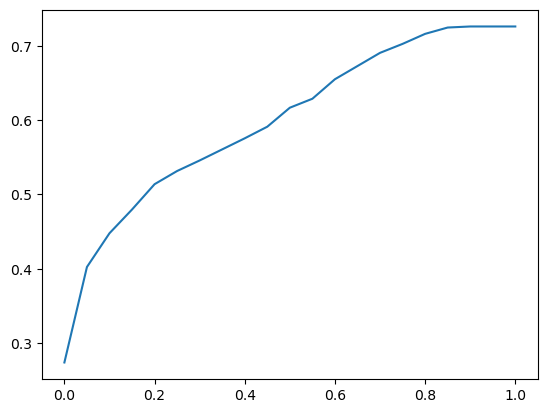

In [151]:
plt.plot(thresholds, scores)

In [152]:
#using scikitlearn

from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred>= 0.5)

0.6167494677075941

In [153]:
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred>= t)
    print('%.2f: %.3f' % (t, score))
    scores.append(score)

0.00: 0.274
0.05: 0.402
0.10: 0.448
0.15: 0.480
0.20: 0.514
0.25: 0.532
0.30: 0.546
0.35: 0.561
0.40: 0.576
0.45: 0.591
0.50: 0.617
0.55: 0.629
0.60: 0.655
0.65: 0.673
0.70: 0.691
0.75: 0.703
0.80: 0.716
0.85: 0.725
0.90: 0.726
0.95: 0.726
1.00: 0.726


In [154]:
# How many false and how many true values

from collections import Counter

In [155]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [156]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [157]:
#Churning
(y_val).mean()

0.2739531582682754

In [158]:
#Not churning
1 - (y_val).mean()

0.7260468417317246

#### The issue with accuracy score is that it is poor when there is class imbalance

### Confusion Matrix

In [159]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [160]:
t = 0.5
predict_positive = (y_pred1 >= t)
predict_negative = (y_pred1 < t)

In [161]:
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

print(tp, tn)

214 918


In [162]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

print(fp, fn)

105 172


In [163]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[918, 105],
       [172, 214]])

In [164]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### Precision

#### Precision is the fraction of positive PREDICTIONS that are correct

In [165]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
accuracy.round(2)

0.8

In [166]:
precision = tp / (tp + fp)
precision

0.670846394984326

In [167]:
tp, tp + fp

(214, 319)

#### Observation: approx 33%, 319 customers were incorrectly classified as churn and sent discount

### Recall
#### Recall is the fraction of correctly classified (ACTUAL) positive examples. 

In [168]:
Recall = tp / (tp + fn)
Recall

0.5544041450777202

In [169]:
 tp, (tp + fn)

(214, 386)

#### Observation: We failed to Identify 55 percent of people who are churning

### ROC Curves

#### Receiver Operating Characteristics checks for all thresholds: True positive Rate (same as Recall) and False Positive rate

In [170]:
tpr = tp / (tp + fn)
tpr

0.5544041450777202

In [171]:
fpr = fp / (fp + tn)
fpr

0.10263929618768329

In [172]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    #Actual values
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    #Prediction values
    predict_positive = (y_pred1 >= t)
    predict_negative = (y_pred1 < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, tn, fn))
    
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 906, 117, 1),
 (0.02, 384, 809, 214, 2),
 (0.03, 382, 754, 269, 4),
 (0.04, 381, 713, 310, 5),
 (0.05, 379, 686, 337, 7),
 (0.06, 377, 662, 361, 9),
 (0.07, 375, 630, 393, 11),
 (0.08, 372, 597, 426, 14),
 (0.09, 369, 569, 454, 17),
 (0.1, 368, 541, 482, 18),
 (0.11, 363, 516, 507, 23),
 (0.12, 363, 501, 522, 23),
 (0.13, 361, 484, 539, 25),
 (0.14, 357, 458, 565, 29),
 (0.15, 351, 442, 581, 35),
 (0.16, 347, 425, 598, 39),
 (0.17, 347, 407, 616, 39),
 (0.18, 345, 388, 635, 41),
 (0.19, 342, 375, 648, 44),
 (0.2, 336, 365, 658, 50),
 (0.21, 331, 348, 675, 55),
 (0.22, 325, 327, 696, 61),
 (0.23, 322, 315, 708, 64),
 (0.24, 317, 310, 713, 69),
 (0.25, 315, 298, 725, 71),
 (0.26, 313, 284, 739, 73),
 (0.27, 307, 272, 751, 79),
 (0.28, 299, 265, 758, 87),
 (0.29, 296, 252, 771, 90),
 (0.3, 290, 246, 777, 96),
 (0.31, 286, 240, 783, 100),
 (0.32, 281, 234, 789, 105),
 (0.33, 279, 229, 794, 107),
 (0.34, 274, 220, 803, 112),
 (0.35000000000000003, 271, 

In [173]:
pd.DataFrame(scores).head()

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,906,117,1
2,0.02,384,809,214,2
3,0.03,382,754,269,4
4,0.04,381,713,310,5


In [174]:
columns = ['threshold', 'tp', 'fp', 'tn', 'fn']

df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,threshold,tp,fp,tn,fn
0,0.00,386,1023,0,0
1,0.01,385,906,117,1
2,0.02,384,809,214,2
3,0.03,382,754,269,4
4,0.04,381,713,310,5


In [175]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores.head()

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,906,117,1,0.997409,0.885630
2,0.02,384,809,214,2,0.994819,0.790811
3,0.03,382,754,269,4,0.989637,0.737048
4,0.04,381,713,310,5,0.987047,0.696970


In [176]:
df_scores[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,368,541,482,18,0.953368,0.528837
20,0.2,336,365,658,50,0.870466,0.356794
30,0.3,290,246,777,96,0.751295,0.240469
40,0.4,251,174,849,135,0.650259,0.170088
50,0.5,214,105,918,172,0.554404,0.102639
60,0.6,151,53,970,235,0.391192,0.051808
70,0.7,67,15,1008,319,0.173575,0.014663
80,0.8,4,0,1023,382,0.010363,0.000000
90,0.9,0,0,1023,386,0.000000,0.000000


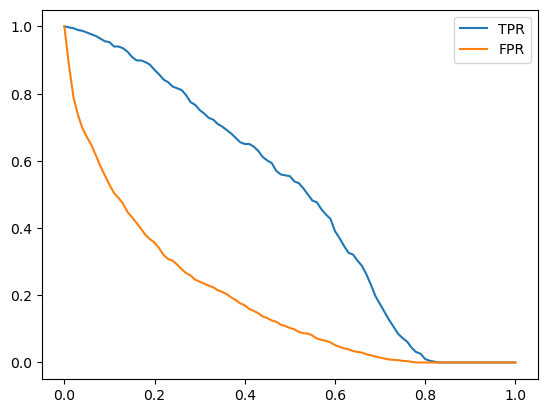

In [177]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()

### Random Model

In [178]:
np.random.seed(1)

y_rand = np.random.uniform(0, 1, size = len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [179]:
((y_rand == 0.5) == y_val).mean()

0.7260468417317246

In [180]:
def tpf_fpr_df(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []

    for t in thresholds:
        #Actual values
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        #Prediction values
        predict_positive = (y_pred1 >= t)
        predict_negative = (y_pred1 < t)

        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, tn, fn))
    
    
    # Create dataframe
    columns = ['threshold', 'tp', 'fp', 'tn', 'fn']  
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [181]:
df_rand = tpf_fpr_df(y_val, y_rand)
df_rand#.head()

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,906,117,1,0.997409,0.885630
2,0.02,384,809,214,2,0.994819,0.790811
3,0.03,382,754,269,4,0.989637,0.737048
4,0.04,381,713,310,5,0.987047,0.696970
...,...,...,...,...,...,...,...
96,0.96,0,0,1023,386,0.000000,0.000000
97,0.97,0,0,1023,386,0.000000,0.000000
98,0.98,0,0,1023,386,0.000000,0.000000
99,0.99,0,0,1023,386,0.000000,0.000000


In [182]:
df_rand[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,368,541,482,18,0.953368,0.528837
20,0.2,336,365,658,50,0.870466,0.356794
30,0.3,290,246,777,96,0.751295,0.240469
40,0.4,251,174,849,135,0.650259,0.170088
50,0.5,214,105,918,172,0.554404,0.102639
60,0.6,151,53,970,235,0.391192,0.051808
70,0.7,67,15,1008,319,0.173575,0.014663
80,0.8,4,0,1023,382,0.010363,0.000000
90,0.9,0,0,1023,386,0.000000,0.000000


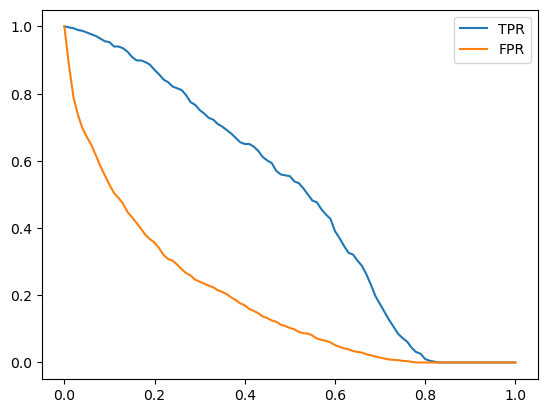

In [183]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

### Ideal Model

An Ideal model could be obtained by sorting the probabilities and then deciding the threshold that clear cuts the two groups. in this case churning verse non churning.

In [184]:
#First we need of know the number of negative and positive examples

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(1023, 386)

In [185]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [186]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [187]:
1 - y_val.mean()

0.7260468417317246

In [188]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [189]:
df_ideal = tpf_fpr_df(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,246,663,360,140,0.637306,0.648094
20,0.2,192,509,514,194,0.497409,0.497556
30,0.3,149,387,636,237,0.386010,0.378299
40,0.4,122,303,720,264,0.316062,0.296188
50,0.5,91,228,795,295,0.235751,0.222874
60,0.6,62,142,881,324,0.160622,0.138807
70,0.7,26,56,967,360,0.067358,0.054741
80,0.8,2,2,1021,384,0.005181,0.001955
90,0.9,0,0,1023,386,0.000000,0.000000


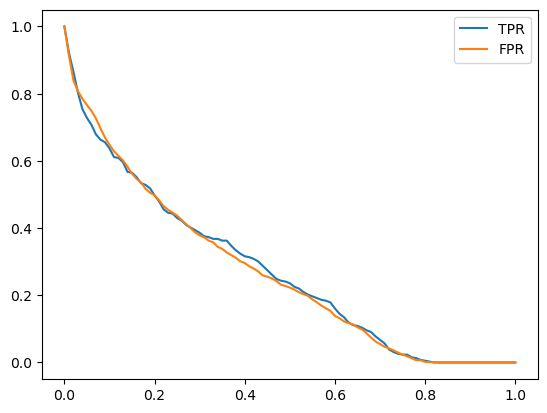

In [190]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

### Putting Everything Together

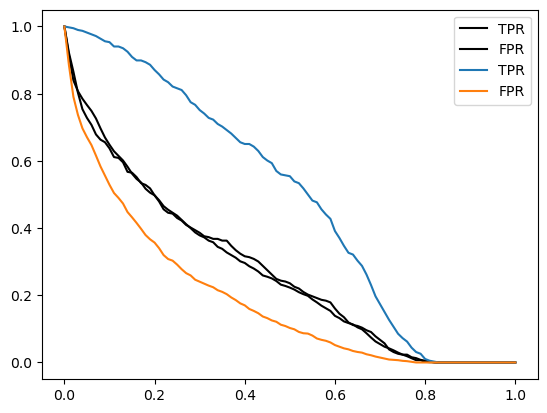

In [191]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR', color = 'black')


# plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
# plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')


plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')

plt.legend()

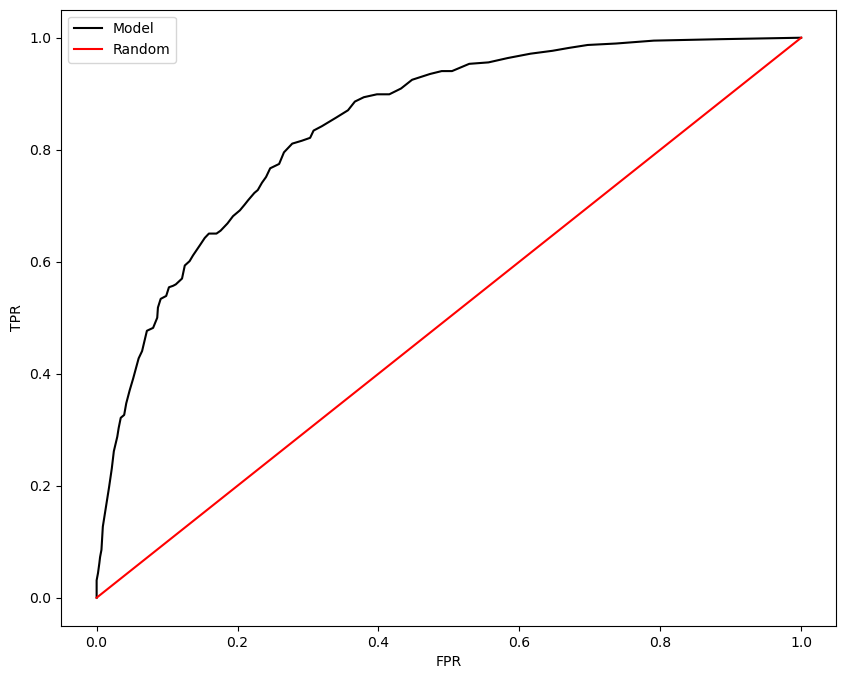

In [192]:
plt.figure(figsize = (10,8))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'Model', color = 'black')
plt.plot([0,1], [0,1], label = 'Random', color = 'red')
#plt.plot(df_rand.fpr, df_rand.tpr, label = 'Random', color = 'red')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'Ideal', color = 'green')

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

NOTE: IF MODEL GOES BELOW BASELINE OR RANDOM, WE NEED TO FLIP POSTITIVE AND NEGATIVE PREDICTION

In [193]:
from sklearn.metrics import roc_curve

In [194]:
fpr, tpr, threshold = roc_curve(y_val, y_pred1)

In [195]:
fpr, tpr, threshold

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.77517107e-04,
        9.77517107e-04, 1.95503421e-03, 1.95503421e-03, 2.93255132e-03,
        2.93255132e-03, 3.91006843e-03, 3.91006843e-03, 4.88758553e-03,
        4.88758553e-03, 5.86510264e-03, 5.86510264e-03, 6.84261975e-03,
        6.84261975e-03, 7.82013685e-03, 7.82013685e-03, 8.79765396e-03,
        8.79765396e-03, 1.07526882e-02, 1.07526882e-02, 1.17302053e-02,
        1.17302053e-02, 1.27077224e-02, 1.27077224e-02, 1.46627566e-02,
        1.46627566e-02, 1.56402737e-02, 1.56402737e-02, 1.66177908e-02,
        1.66177908e-02, 1.75953079e-02, 1.75953079e-02, 1.85728250e-02,
        1.85728250e-02, 2.05278592e-02, 2.05278592e-02, 2.15053763e-02,
        2.15053763e-02, 2.24828935e-02, 2.24828935e-02, 2.34604106e-02,
        2.34604106e-02, 2.44379277e-02, 2.44379277e-02, 2.63929619e-02,
        2.63929619e-02, 2.73704790e-02, 2.73704790e-02, 2.83479961e-02,
        2.83479961e-02, 2.93255132e-02, 2.93255132e-02, 3.030303

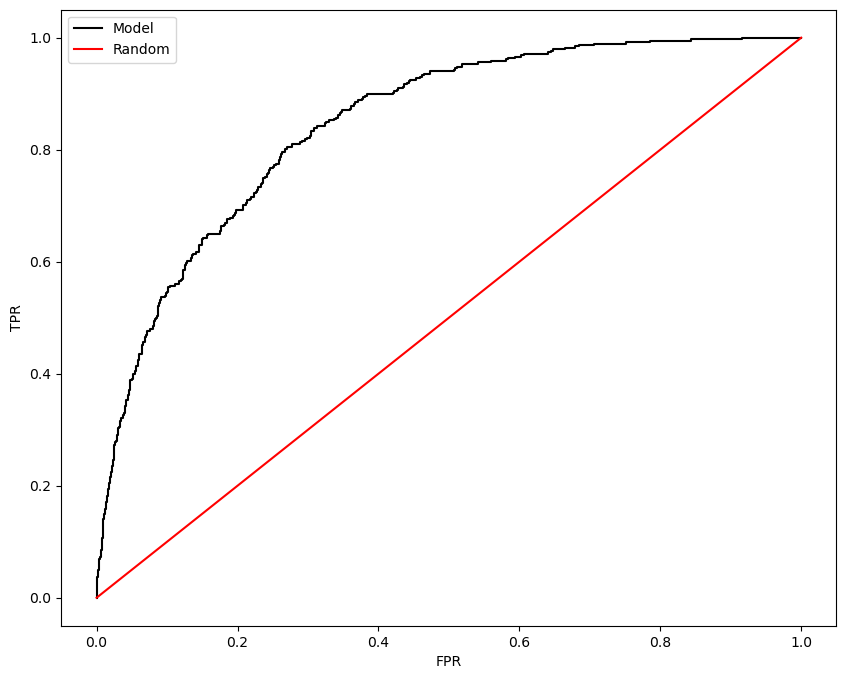

In [196]:
plt.figure(figsize = (10,8))

plt.plot(fpr, tpr, label = 'Model', color = 'black')
plt.plot([0,1], [0,1], label = 'Random', color = 'red')
#plt.plot(df_rand.fpr, df_rand.tpr, label = 'Random', color = 'red')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'Ideal', color = 'green')

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

### Area Under the Curve (AUC)

* Explains the probability that a randomly selected positive example is greater than a randomly selected negative example
* A good AUC means the model orders the groups well
* Good for binary classification problems

In [197]:
from sklearn.metrics import auc

In [198]:
auc(fpr, tpr)

0.8452205491316305

In [199]:
auc(df_scores.fpr, df_scores.tpr )

0.8450204873403936

In [200]:
auc(df_ideal.fpr, df_ideal.tpr)

0.5016042929715001

In [201]:
# We can also use roc auc

from sklearn.metrics import roc_auc_score

In [202]:
roc_auc_score(y_val, y_pred1)

0.8452205491316305

In [203]:
#roc auc in two lines of code
fpr, tpr, threshold = roc_curve(y_val, y_pred1)
auc(fpr, tpr)

0.8452205491316305

In [204]:
neg = y_pred1[y_val == 0]
pos = y_pred1[y_val == 1]


In [205]:
import random

In [206]:
pos_index = random.randint(0, len(pos) - 1)
neg_index = random.randint(0, len(neg) - 1)

In [207]:
pos_index > neg_index

False

In [208]:
n = 10000
success = 0

for i in range(n):
    pos_index = random.randint(0, len(pos) - 1)
    neg_index = random.randint(0, len(neg) - 1)
    
    if pos[pos_index] > neg[neg_index]:
        success += 1
        
success/n

0.8473

In [209]:
# Vectorizing AUC with np.random
random.seed(1)
n = 10000
pos_index = np.random.randint(0, len(pos), size = n)
neg_index = np.random.randint(0, len(neg), size = n)

In [210]:
pos[pos_index] > neg[neg_index]

array([False,  True,  True, ...,  True,  True,  True])

In [211]:
(pos[pos_index] > neg[neg_index]).mean()

0.8368

### k fold cross validation

In [212]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model= LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [213]:
dv, model = train(df_train, y_train)

In [214]:
def predict(df_val, dv, model):
    dicts = df_val[categorical + numerical].to_dict(orient = 'records')
    
    X_val = dv.transform(dicts)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return y_pred

In [215]:
y_pred = predict(df_val, dv, model)

In [216]:
y_pred

array([0.00787269, 0.2080295 , 0.21872692, ..., 0.15199128, 0.7804137 ,
       0.80878759])

In [217]:
from sklearn.model_selection import KFold

In [218]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [219]:
next(kfold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [220]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [221]:
len(train_idx), len(val_idx)

(5070, 564)

In [222]:
len(df_full_train)

5634

In [223]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [224]:
#!pip install tqdm

In [225]:
from tqdm.auto import tqdm

In [226]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [227]:
scores

[0.8479398247539081,
 0.8411974009900991,
 0.8557214756739697,
 0.8331742243436754,
 0.8255583126550868,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8452349192233585,
 0.861819770764008]

In [228]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.840 +- 0.012


### Parameter Tuning
Adding C, regularisation to the training function

In [229]:
def train(df_train, y_train, C = 0.001):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model= LogisticRegression(solver='lbfgs', max_iter=1000, C = C)
    model.fit(X_train, y_train)
    
    return dv, model

In [230]:
dv, model = train(df_train, y_train, C = 0.1)

In [231]:
n_splits = 5

C = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

for c in tqdm(C):
    scores = []
    
    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C = c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C = %s %.3f +-%.3f' % (c, np.mean(scores), np.std(scores)))


  0%|          | 0/7 [00:00<?, ?it/s]

C = 0.001 0.825 +-0.009
C = 0.01 0.840 +-0.009
C = 0.1 0.841 +-0.008
C = 0.5 0.840 +-0.007
C = 1 0.841 +-0.008
C = 5 0.840 +-0.008
C = 10 0.841 +-0.008


#### Observation: C = 1 gave us the best paramater roc_auc_score

In [232]:
dv, model = train(df_full_train, df_full_train.churn.values, C = 1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

In [233]:
auc

0.8572386167896259

* Use cross validation when the dataset is small or quite large, and if we want to understand the standard deviation accross different folds to understand how stable the model is. For bigger dataset use 2 or 3 splits. for smaller, use 5-10 splits

* Use usual train_test_split is the dataset is very large

### Saving our model and using it

In [258]:
C = 1.0

ouput_file = f'model_C={C}.bin'

f_out = open(ouput_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close() # If we fail to close, we may not be sure if the content is inside, and if other services can use it

In [238]:
# ## to solve the issues that may arise from failing to close

# with open(ouput_file, 'wb') as f_out:
#     pickle.dump((dv, model), f_out)

In [239]:
with open(ouput_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [243]:
df_full_train.iloc[5,:]

customerid              4765-oxppd
gender                      female
seniorcitizen                    0
partner                        yes
dependents                     yes
tenure                           9
phoneservice                   yes
multiplelines                   no
internetservice                dsl
onlinesecurity                 yes
onlinebackup                   yes
deviceprotection               yes
techsupport                    yes
streamingtv                     no
streamingmovies                 no
contract            month-to-month
paperlessbilling                no
paymentmethod         mailed_check
monthlycharges                65.0
totalcharges                663.05
churn                            1
Name: 611, dtype: object

In [247]:
customer = df.iloc[5, :].to_dict()
customer.pop('churn')

{'customerid': '9305-cdskc',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 8,
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 99.65,
 'totalcharges': 820.5}

In [248]:
customer.pop('customerid')

'9305-cdskc'

In [255]:
X = dv.transform(customer)
X

array([[  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          1.  ,   0.  ,   0.  ,   1.  ,   0.  ,  99.65,   0.  ,   0.  ,
          1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
          1.  ,   0.  ,   0.  ,   8.  , 820.5 ]])

In [257]:
model.predict_proba(X)[0, 1]

0.7887128075112909